<h1 align='center'><u>Cats Vs Dogs Classification</u></h1>

### # Data Source:- https://www.kaggle.com/arnaudeq/cats-vs-dogs-1000

## Importing some important libraries:

In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


## Loading our datasets:

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'

## Creating our deep learning model:

In [3]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False) # + [3] for RGB

In [4]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [5]:
# useful for getting number of classes
folders = glob('Datasets/train/*')

In [6]:
folders

['Datasets/train\\cats', 'Datasets/train\\dogs']

In [7]:
len(folders)

2

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)

class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(x)
prediction = Dense(len(folders), activation='sigmoid')(class1)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [9]:
# tell the model what cost and optimization method to use
from keras.optimizers import SGD
opt = SGD(lr=0.001, momentum=0.9)

model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

## Data Preprocessing:

In [10]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [11]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

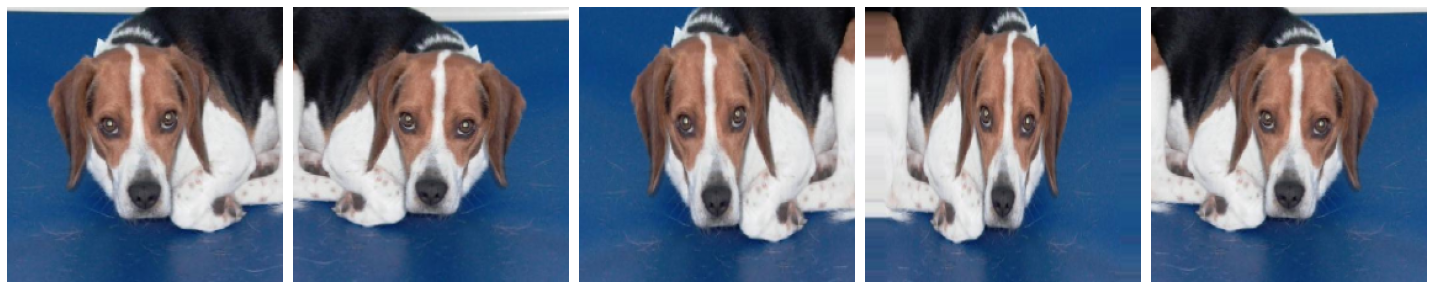

In [15]:
augmented_images = [training_set[5][0][0] for i in range(5)]
plotImages(augmented_images)

## Fitting our model:

In [12]:
# fit the model
r = model.fit_generator(training_set,validation_data=test_set,epochs=10,steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))

Epoch 1/10
32/32 [==============================] - 1223s 38s/step - loss: 0.6936 - accuracy: 0.5140 - val_loss: 0.5606 - val_accuracy: 0.4990
Epoch 2/10
32/32 [==============================] - 1192s 37s/step - loss: 0.6035 - accuracy: 0.5640 - val_loss: 0.3128 - val_accuracy: 0.8310
Epoch 3/10
32/32 [==============================] - 1218s 38s/step - loss: 0.4058 - accuracy: 0.8135 - val_loss: 0.5521 - val_accuracy: 0.8190
Epoch 4/10
32/32 [==============================] - 1205s 38s/step - loss: 0.3129 - accuracy: 0.8720 - val_loss: 0.2066 - val_accuracy: 0.8570
Epoch 5/10
32/32 [==============================] - 1191s 37s/step - loss: 0.3146 - accuracy: 0.8570 - val_loss: 0.1669 - val_accuracy: 0.9000
Epoch 6/10
32/32 [==============================] - 1224s 38s/step - loss: 0.2785 - accuracy: 0.8820 - val_loss: 0.1752 - val_accuracy: 0.9005
Epoch 7/10
32/32 [==============================] - 1194s 37s/step - loss: 0.2641 - accuracy: 0.8935 - val_loss: 0.1989 - val_accuracy: 0.8780

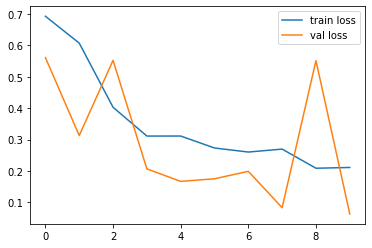

<Figure size 432x288 with 0 Axes>

In [16]:
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

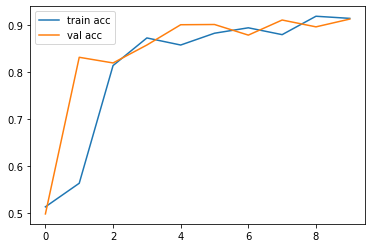

<Figure size 432x288 with 0 Axes>

In [18]:
# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [19]:
# Saving our model
model.save('model_vgg19.h5')

<h1></h1>

# Prediction:~

### 1.First importing cat sample image.

In [30]:
img = image.load_img('test\sample1.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

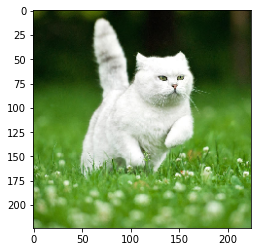

In [31]:
plt.imshow(img)

### How to classify the image:-

* If classes[0][0] came 1 then it is a cat.
* if classes[0][0] came 0 or close to zero then it is dog.

In [32]:
classes[0][0]

1.0

### *The predicted value is one. Therefore, it is a cat.

<h1></h1>

### 2. Now importing dog sample image.

In [41]:
img = image.load_img('test\sample_image.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

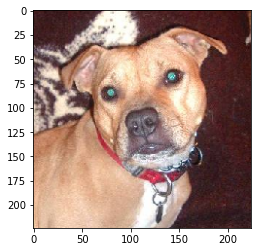

In [42]:
plt.imshow(img)

In [45]:
classes[0][0]

0.0

### *The predicted value is Zero. Therefore, it is a dog.

<h1></h1>

### 3. lets check our model by giving it a confusing Image of a dog:~

In [46]:
img = image.load_img('test\sample_image1.jpg', target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

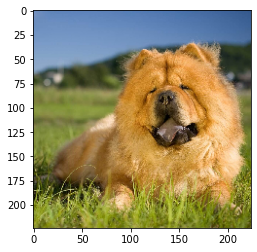

In [47]:
plt.imshow(img)

In [48]:
classes[0][0]

4.6030653e-29

### Our model did a great job by predicting it a dog. It got a little confuse but at last gave us a good prediction.

<h1> </h1>

<h1 align='center'>*------E N D------*</h1>